step:  2
start:  [0, 0]
run time: 0.3059229850769043 sec
{'001': 2032, '101': 2089, '000': 2007, '100': 2064}


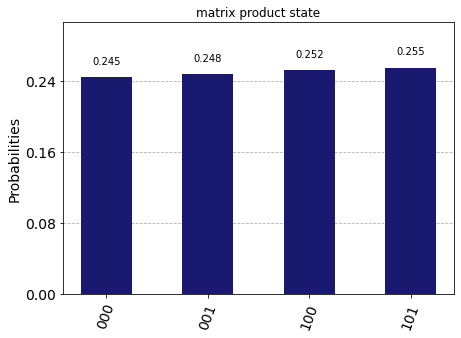

In [1]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import Aer, BasicAer, execute
from qiskit.providers.aer import QasmSimulator
from qiskit.visualization import plot_histogram, plot_state_city
%matplotlib inline
simulator_mps = Aer.get_backend('qasm_simulator');
backend_opts_mps = {"method":"matrix_product_state"}

q = QuantumRegister(3, 'q');
c = ClassicalRegister(3, 'c');
circ = QuantumCircuit(q,c);

shift_q = QuantumRegister(3); # register: 3-qubit
shift_circ = QuantumCircuit(shift_q, name='shift_circ');
# forward
shift_circ.cx (shift_q[0], shift_q[1]);
shift_circ.x (shift_q[1]);
shift_circ.ccx (shift_q[0], shift_q[1], shift_q[2]);
#
shift_circ.x (shift_q[0]);
# backward
shift_circ.ccx (shift_q[0], shift_q[1], shift_q[2]);
shift_circ.x (shift_q[1]);
shift_circ.cx (shift_q[0], shift_q[1]);
shift_gate = shift_circ.to_instruction();

# step number
N_step = 2;

# start point
k_init = [0,0];
for n in range(2):
    if k_init[n] == 1:
        circ.x (q[n+1]);
    elif k_init[n] == 0:
        circ.id (q[n+1]);

# start walk
for i in range(N_step):
    circ.h (q[0]); # coin operation; coin qubit=q[0]
    circ.append (shift_gate, [q[0], q[1], q[2]]); # shift operation      
# measurement
circ.measure ([q[0], q[1], q[2]], [c[0], c[1], c[2]])

# execute: matrix product state
job_sim_mps = execute([circ], QasmSimulator(), backend_options=backend_opts_mps, shots=8192);
result_mps = job_sim_mps.result();
counts = result_mps.get_counts();

# print results
print("step: ", N_step)
print("start: ", k_init)
print("run time: {} sec".format(result_mps.time_taken))
print(counts)
plot_histogram(counts, color='midnightblue', title='matrix product state')

2 -step circuit
initial point at: [0, 0]


/Users/ycldingo/anaconda3/envs/IBMQ/lib/python3.7/site-packages/matplotlib/mathtext.py:2525: SyntaxWarning: Exception creating Regex for oneOf, building MatchFirst
  p.subsuperop    <<= oneOf(["_", "^"])


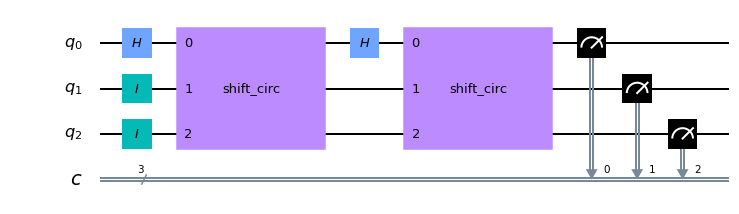

In [3]:
print(N_step,"-step circuit")
print("initial point at:", k_init)
circ.draw(output='mpl')

shift gate


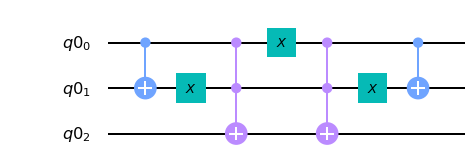

In [4]:
print("shift gate")
shift_circ.draw(output='mpl')

2 -step circuit
initial point at: [0, 0]


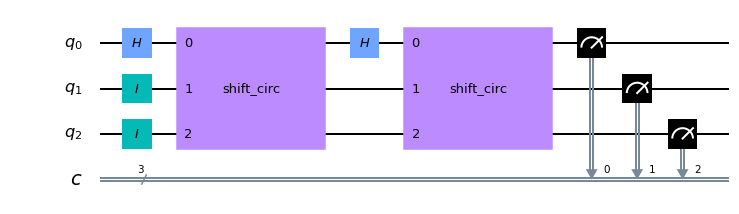

In [5]:
print(N_step,"-step circuit")
print("initial point at:", k_init)
circ.draw(output='mpl')